In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
#import relevant libraries for logistics regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
#import the relevant libraries for KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#import the relevant libraries for decision tree
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
import graphviz
#import the relevant libraries for random forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

from subprocess import call
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
#Cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df =pd.read_csv('healthcare-dataset-stroke-data.csv')
healthcare_stroke = df.copy()

# Prétaitement 

# Nettoyage

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)#Remplacons les valeurs NaN de la colonne bmi par la moyenne des bmi

In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Transformation

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [7]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [8]:
#Utilisons l'encodage manuelle pour remplacer les valeurs catégorielles par des valeurs numériques 
dictGender = {'Male': 1, 'Female' : 0, 'Other':2}
dictEverMarried = {'Yes': 1, 'No': 0}
dictResidenceType = {'Urban': 1, 'Rural': 0}
df['gender'].replace(dictGender , inplace=True) 
df['ever_married'].replace(dictEverMarried , inplace=True) 
df['Residence_type'].replace(dictResidenceType , inplace=True) 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [9]:
#utilisons la fonction d’encodeur d’étiquettes dans la bibliothèque sklearn pour remplacer les autres valeurs catégorielles 
#par des valeurs numériques
encoder = LabelEncoder()
df['work_type'] = encoder.fit_transform(df['work_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

In [10]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [12]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

# Sélection des fonctionnalités

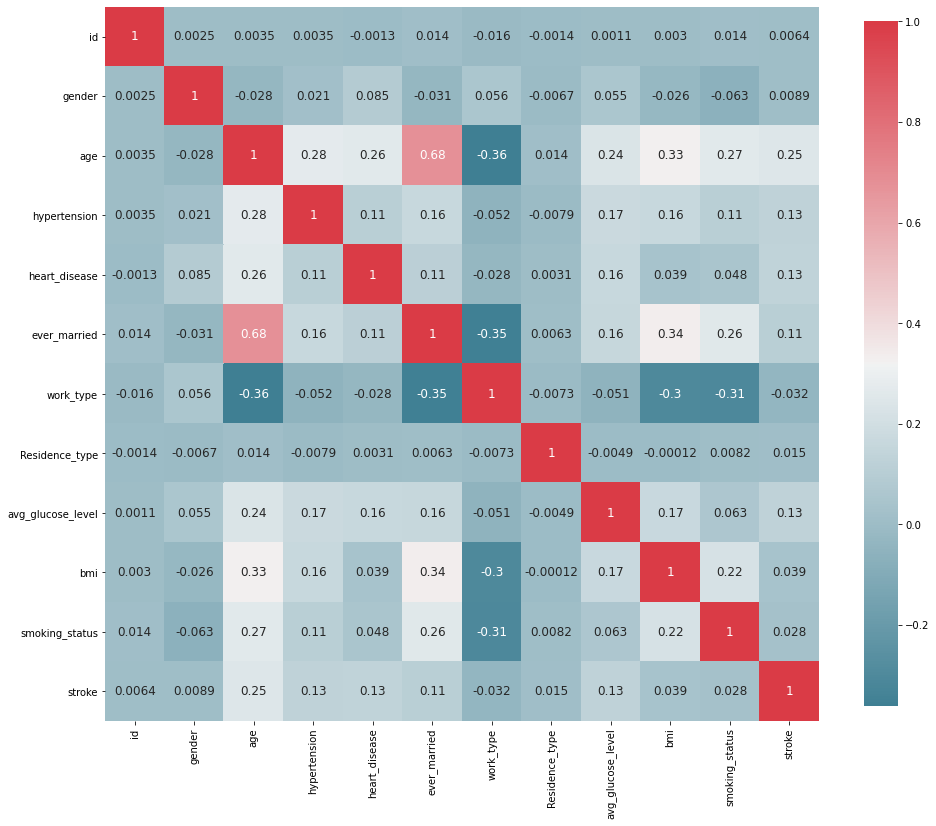

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 16 , 14 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( df )

Les fonctionnalités ayant une meilleure corrélation avec notre input ici "stroke" sont les suivantes: gender, age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status
Ce sont celles que nous utiliserons dans la suite de notre analyse.
Supprimons les colonnes qui ne nous sont pas utiles.

In [14]:
df.drop('id',axis=1, inplace=True)
df.drop('work_type',axis=1, inplace=True)
df.drop('Residence_type',axis=1, inplace=True)
df.drop('ever_married',axis=1, inplace=True)

In [15]:
df.head(50)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,202.21,28.893237,2,1
2,1,80.0,0,1,105.92,32.500000,2,1
3,0,49.0,0,0,171.23,34.400000,3,1
4,0,79.0,1,0,174.12,24.000000,2,1
5,1,81.0,0,0,186.21,29.000000,1,1
6,1,74.0,1,1,70.09,27.400000,2,1
7,0,69.0,0,0,94.39,22.800000,2,1
8,0,59.0,0,0,76.15,28.893237,0,1
9,0,78.0,0,0,58.57,24.200000,0,1


In [16]:
df.to_csv("healthcare-dataset-stroke-pret.csv")

# Visualisation des données

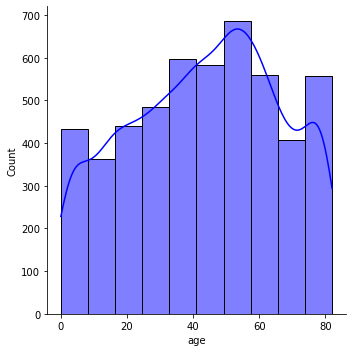

In [17]:
sns.displot(df['age'], bins=10, kde=True, color="blue");#visualisons la distribuion de l'age dans notre jeu de données

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

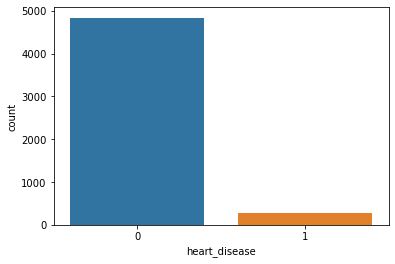

In [18]:
sns.countplot(x='heart_disease', data=df)
plt.xticks()
#visualisons la distribuion des heart_disease(maladies cardiaques) dans notre jeu de données

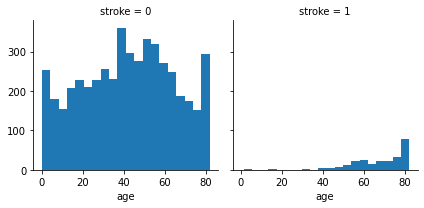

In [19]:
g= sns.FacetGrid(df, col='stroke')
g.map(plt.hist,'age',bins=20)

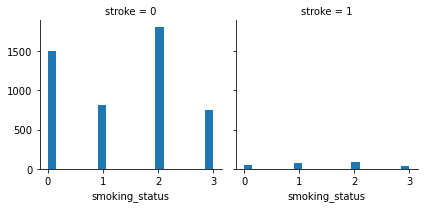

In [20]:
g= sns.FacetGrid(df, col='stroke')
g.map(plt.hist,'smoking_status',bins=20)

# Prédiction Machine Learning

Il existe deux types de problèmes d'apprentissage supervisé à savoir la régression(Prédit une valeur numérique en fonction des données d'observation précédentes) et la classification(Prédit la catégorie à laquelle appartiennent les données). Dans notre cas nous voulons savoir si un individu est susceptible de contracter un AVC ce qui induit que notre sortie serait oui ou non. D'ou nous avons un cas de classification.
Nous testerons alors les différents algorithmes de classification tels que : Decision Tree, Random Forest, Logistic Regression et K-Nearest-Neighbor(K-NN).

# Logistic Regression

In [21]:
x = df[['gender', 'age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
y = df[['stroke']]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)#splitting data with test size of 25%

In [23]:
logreg = LogisticRegression() #build our logistic model
logreg.fit(x_train, y_train) #fitting training data
y_pred  = logreg.predict(x_test) #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.95


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

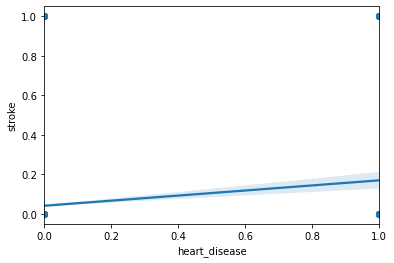

In [24]:
sns.regplot(x='heart_disease',y='stroke',data=df)

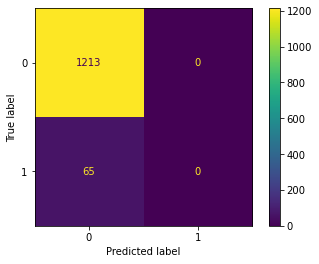

In [25]:
#confusion matrix 
plot_confusion_matrix(logreg, x_test, y_test) 

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Nearest-Neighbor

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30) #split our data with test size of 20% 

In [28]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 1 is: 0.96
Accuracy for k= 2 is: 0.96
Accuracy for k= 3 is: 0.96
Accuracy for k= 4 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 5 is: 0.96
Accuracy for k= 6 is: 0.96
Accuracy for k= 7 is: 0.96
Accuracy for k= 8 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Accuracy for k= 9 is: 0.96
Accuracy for k= 10 is: 0.96
Accuracy for k= 11 is: 0.96
Accuracy for k= 12 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Accuracy for k= 13 is: 0.96
Accuracy for k= 14 is: 0.96
Accuracy for k= 15 is: 0.96
Accuracy for k= 16 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 17 is: 0.96
Accuracy for k= 18 is: 0.96
Accuracy for k= 19 is: 0.96
Accuracy for k= 20 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Accuracy for k= 21 is: 0.96
Accuracy for k= 22 is: 0.96
Accuracy for k= 23 is: 0.96
Accuracy for k= 24 is: 0.96


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Accuracy for k= 25 is: 0.95
Accuracy for k= 26 is: 0.96
Accuracy for k= 27 is: 0.94
Accuracy for k= 28 is: 0.96
Accuracy for k= 29 is: 0.91


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Text(0, 0.5, 'Testing Accuracy')

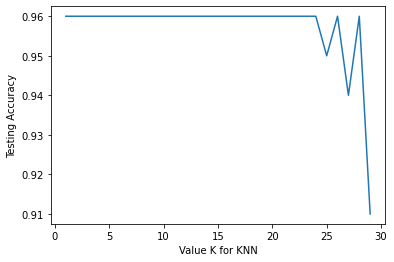

In [29]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
#Grâce à ce graphique, nous pouvons facilement trouver la meilleure valeur K

In [30]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.960093896713615


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Decision Tree

In [31]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=10)

In [32]:
#applying tree algorithm with pruning
classifier = tree.DecisionTreeClassifier(criterion ="gini", splitter ='random', max_leaf_nodes=10, min_samples_leaf = 5, max_depth = 5)  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9478147423352903


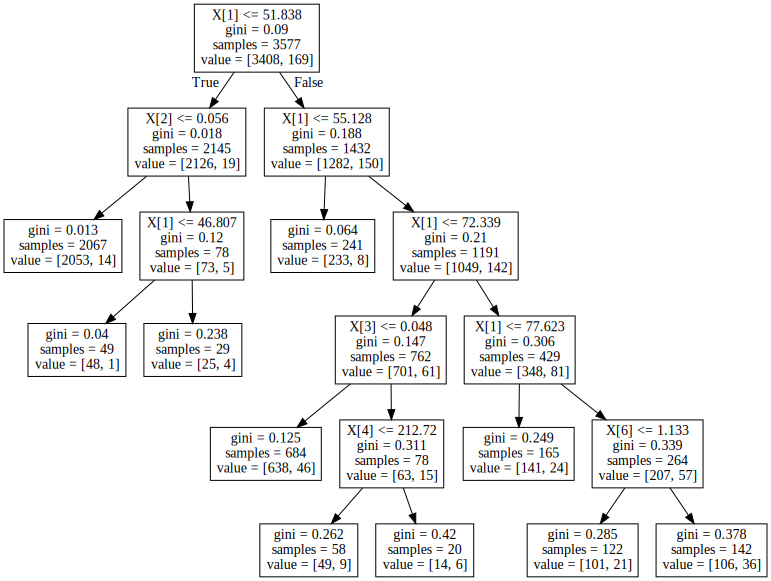

In [33]:
dot_data =tree.export_graphviz(classifier, out_file =None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

# Random Forest

In [34]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=10)

In [35]:
clf = RandomForestClassifier(n_estimators=150, random_state=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

<ipython-input-35-007f54b0886a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)  #Training our model


Accuracy: 0.9465101108936725


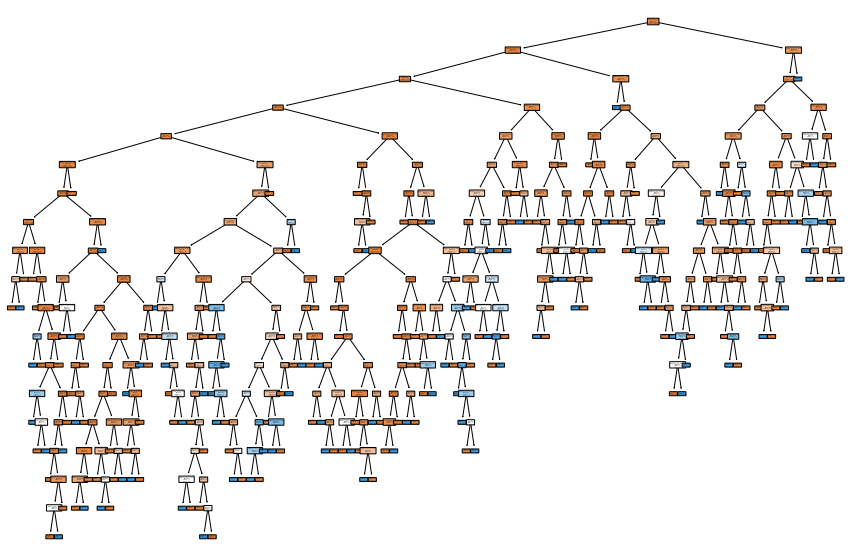

In [36]:
fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[10],
          feature_names=x.columns,
          filled=True, rounded=True,
          proportion = False,
          precision = 2)
plt.show()

La validation croisée est une méthode utilisée pour estimer les performances des modèles 
d'apprentissage automatique.

In [37]:
#Cross validation
scoresRandom = cross_val_score(clf,x,y, cv =5)
scoresDecision = cross_val_score(classifier,x,y, cv =5)
scoresKnn = cross_val_score(knn,x,y, cv =5)
scoresLog = cross_val_score(logreg,x,y, cv =5)
print ("Accuracy for randomForest:", sum(scoresRandom)/5)
print ("Accuracy for Decision Tree :", sum(scoresDecision)/5)
print ("Accuracy for KNN :", sum(scoresKnn)/5)
print ("Accuracy for logistic regression :", sum(scoresLog)/5)

C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A co

Accuracy for randomForest: 0.9489236790606654
Accuracy for Decision Tree : 0.9504892367906066
Accuracy for KNN : 0.9512720156555773
Accuracy for logistic regression : 0.9512720156555773


C:\Users\Haichatou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Au regard de tout ce qui précède, nous avons décider d'utiliser l'algorithme K-Nearest-Neighbor car il semble avoir une meilleur performance que les autres modèles prealablement testés. Une performance qui est de 96%

In [39]:
prd=pd.DataFrame(columns=x.columns)
def avc_predict():
    gender=int(input(print("Write your gender( 1=male or 0=female):")))
    age=int(input(print("Write your age: ")))
    hypertension= int(input(print("Do you have hypertension(1=yes, 0=no )?:")))
    heart_disease=int(input(print("Do you have heart disease(1=yes or 0=no) ?: ")))
    avg_glucose_level=float(input(print("Write your average glucose level: ")))
    bmi = float(input(print("Write your bmi:")))
    smoking_status = int(input(print("Are you smoking(1 for formerly smoked, 2 for never smoked, 3 for smokes )")))
    prd.loc[-1]=[gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status]
    y_pred=knn.predict(prd)
    if y_pred==1:
        pred="You might have a stroke"
    elif y_pred==0:
        pred="You are out of danger"
    print(pred)
avc_predict()

Write your gender( 1=male or 0=female):
None0
Write your age: 
None30
Do you have hypertension(1=yes, 0=no )?:
None0
Do you have heart disease(1=yes or 0=no) ?: 
None0
Write your average glucose level: 
None65
Write your bmi:
None32
Are you smoking(1 for formerly smoked, 2 for never smoked, 3 for smokes )
None2
You are out of danger
